# MODEL TRAINING

Import Data and Required Packages

In [1]:
# Basic Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv(r'C:\Users\DELL\DATA SCIENCE\New_Projects\ML_Project_Pipeline\Notebook\data\StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Preparing X and y Variables

In [10]:
# Heare we to drop math_score 
X = df.drop(columns=['math score'])
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [13]:
# Exploring the data

print("categories in 'gender' variable:  ",end=" ")
print(df['gender'].unique())

print("categories in 'race/ethnicity' variable:  ",end=" ")
print(df['race/ethnicity'].unique())

print("categories in 'parental level of education' variable:  ",end=" ")
print(df['parental level of education'].unique())

print("categories in 'lunch' variable:  ",end=" ")
print(df['lunch'].unique())

print("categories in 'test preparation course' variable:  ",end=" ")
print(df['test preparation course'].unique())

categories in 'gender' variable:   <StringArray>
['female', 'male']
Length: 2, dtype: str
categories in 'race/ethnicity' variable:   <StringArray>
['group B', 'group C', 'group A', 'group D', 'group E']
Length: 5, dtype: str
categories in 'parental level of education' variable:   <StringArray>
[ 'bachelor's degree',       'some college',    'master's degree',
 'associate's degree',        'high school',   'some high school']
Length: 6, dtype: str
categories in 'lunch' variable:   <StringArray>
['standard', 'free/reduced']
Length: 2, dtype: str
categories in 'test preparation course' variable:   <StringArray>
['none', 'completed']
Length: 2, dtype: str


In [11]:
y = df['math score']

In [ ]:
y  # Output feature

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [14]:
# Create Column Transformer 3 types of Transformers

num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StanderdScaler", numeric_transformer, num_features),
    ]
)

C:\Users\DELL\AppData\Local\Temp\ipykernel_12392\333711568.py:4: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat_features = X.select_dtypes(include='object').columns


In [15]:
X = preprocessor.fit_transform(X)

In [16]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]], shape=(1000, 19))

In [17]:
X.shape

(1000, 19)

In [18]:
# Separate dataset into Train and Test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1234)
X_train.shape, X_test.shape

((800, 19), (200, 19))

Create an Evaluate function to give all metrics after Model Training

In [19]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

Create Models

In [20]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list = []

for i in range (len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train Model

    # Make Prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model Performance Training set")
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print("--------------------------------------------")

    print("Model Performance Test set")
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')

Linear Regression
Model Performance Training set
- Root Mean Squared Error: 5.2363
- Mean Absolute Error: 4.1349
- R2 Score: 0.8808
--------------------------------------------
Model Performance Test set
- Root Mean Squared Error: 5.6933
- Mean Absolute Error: 4.6902
- R2 Score: 0.8580


Lasso
Model Performance Training set
- Root Mean Squared Error: 6.4660
- Mean Absolute Error: 5.1026
- R2 Score: 0.8182
--------------------------------------------
Model Performance Test set
- Root Mean Squared Error: 6.7200
- Mean Absolute Error: 5.3210
- R2 Score: 0.8022


Ridge
Model Performance Training set
- Root Mean Squared Error: 5.2365
- Mean Absolute Error: 4.1345
- R2 Score: 0.8808
--------------------------------------------
Model Performance Test set
- Root Mean Squared Error: 5.6984
- Mean Absolute Error: 4.6901
- R2 Score: 0.8578


K-Neighbors Regressor
Model Performance Training set
- Root Mean Squared Error: 5.8060
- Mean Absolute Error: 4.6015
- R2 Score: 0.8534
---------------------

Results

In [21]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"], ascending=False)

,Model Name,R2_Score
0,Linear Regression,0.858036
2,Ridge,0.857779
7,CatBoosting Regressor,0.835024
5,Random Forest Regressor,0.818455
8,AdaBoost Regressor,0.815610
1,Lasso,0.802216
6,XGBRegressor,0.800136
3,K-Neighbors Regressor,0.779917
4,Decision Tree,0.697680


Linear Regression

In [22]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 85.80


Plot y_predict and y_test

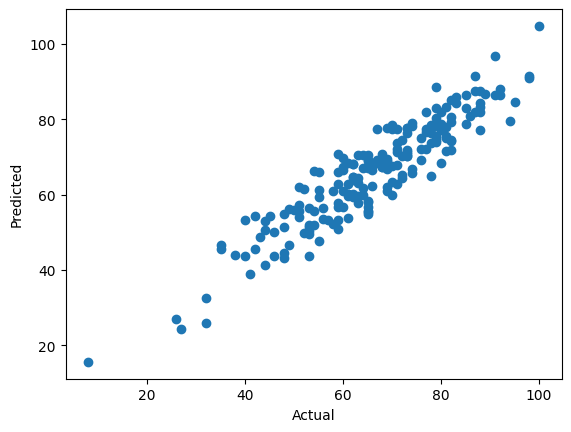

In [23]:
plt.scatter(y_test,y_pred);
plt.xlabel("Actual");
plt.ylabel("Predicted");

<Axes: xlabel='math score'>

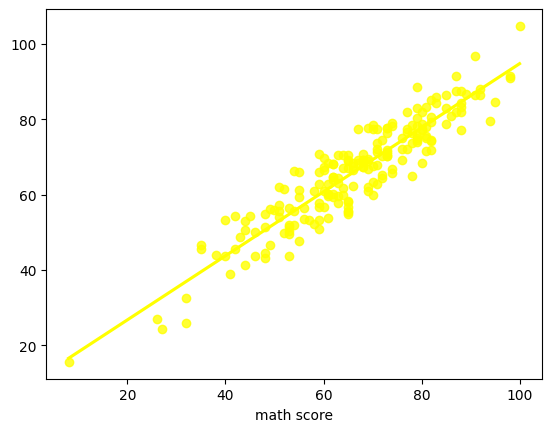

In [24]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='Yellow')

Difference between Actual and predicted Values

In [25]:
pred_df = pd.DataFrame({'Actual Value':y_test, 'Predict Value':y_pred, 'Difference':y_test-y_pred})
pred_df

,Actual Value,Predict Value,Difference
681,60,69.845894,-9.845894
990,86,80.870863,5.129137
155,70,77.394054,-7.394054
768,68,67.260451,0.739549
438,70,59.977424,10.022576
...,...,...,...
376,80,77.470771,2.529229
731,55,47.765881,7.234119
594,92,86.367324,5.632676
65,67,69.256544,-2.256544
